In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from box_count import rasterize, box_fraction

# Origin in bottom left
LEFT = np.array([0, 0])
RIGHT = np.array([0, 1])
TOP = np.array([np.sqrt(3)/2, 0.5])
CORNERS = [LEFT, RIGHT, TOP]

In [2]:
def generate_triangle(seed: np.ndarray, iters: int) -> np.ndarray:
    """shape (2, iters)"""
    out = np.empty((2, iters))
    out[:, 0] = seed

    for i in range(1, iters):
        out[:, i] = (random.choice(CORNERS) + out[:, i-1])/2
    
    return out

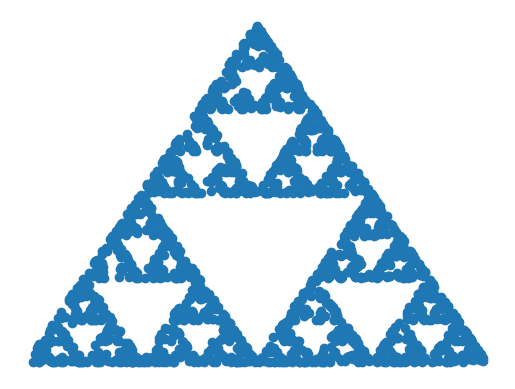

In [3]:
t = generate_triangle(np.array([0.1, 0.1]), 2000)

plt.figure()
plt.scatter(t[1, :], t[0, :])
plt.axis("off")
plt.show()

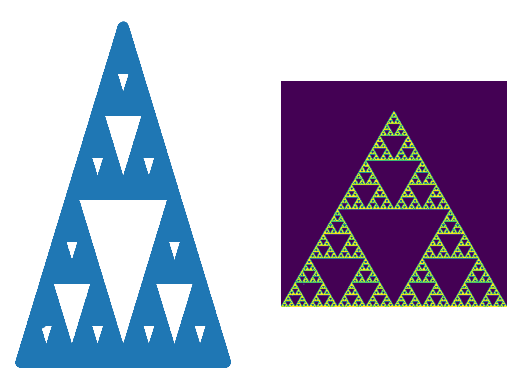

In [4]:
t = generate_triangle(np.array([0.1, 0.1]), 200000)
tr = rasterize(t, (400, 400))

plt.figure()
plt.subplot(1,2,1)
plt.scatter(t[1, :], t[0, :])
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(tr, origin="lower")
plt.axis("off")
plt.show()

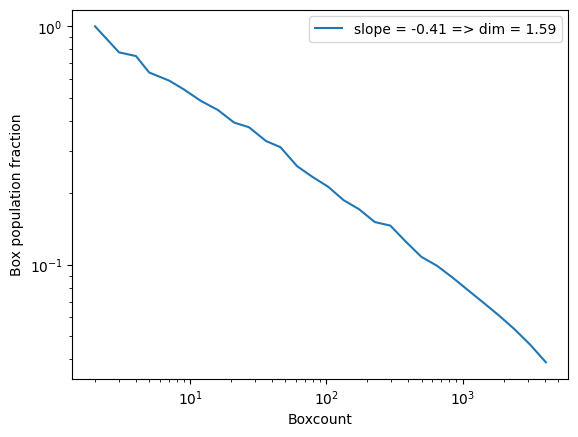

In [5]:
t = generate_triangle(np.array([0.1, 0.1]), 2000000)
d = []
boxes = np.logspace(1, 12, 30, endpoint=True, base=2, dtype=np.int64)

for boxcount in boxes:
    d.append(box_fraction(t, boxcount))

slope = np.polyfit(np.log2(boxes), np.log2(d), deg=1)
slope = slope[0]

plt.figure()
plt.loglog(boxes, d)
plt.xlabel("Boxcount")
plt.ylabel("Box population fraction")
plt.legend([f"{slope = :.2f} => dim = {2 + slope :.2f}"])
plt.show()